In [1]:
import numpy as np

X = 2 * np.random.rand(100, 1)
Y = 4 + 3 * X + np.random.randn(100, 1)

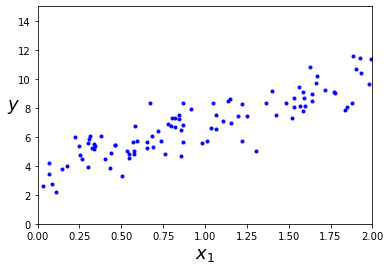

In [2]:
import matplotlib.pyplot as plt
plt.plot(X, Y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

##  1. Using Normal Equation Method

In [3]:
# Using normal Equation to minimize θ)
X_b = np.c_[np.ones((100, 1)), X]   # Adding Bias term Xo in dataset

theta_min = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(Y)
theta_min

array([[3.69163486],
       [3.22347051]])

In [4]:
# Making Predictions using θ_min
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # Adding bias term using concatenation(np.c_)

y_predict = X_new_b . dot(theta_min)
y_predict

array([[ 3.69163486],
       [10.13857588]])

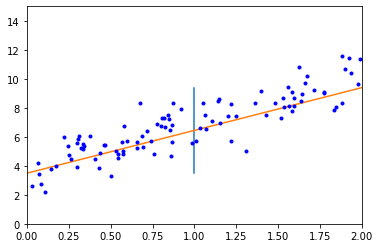

In [22]:
# plot the prediction
plt.plot(X_new_b, y_predict)
plt.plot(X, Y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

### Using Scikit-Learn (using same method)

In [6]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, Y)

print(lin_reg.intercept_, lin_reg.coef_)

[3.69163486] [[3.22347051]]


In [7]:
lin_reg.predict(X_new)

array([[ 3.69163486],
       [10.13857588]])

## 2. Using Gradient Descent

### Using Batch Gradient Descent

In [8]:
eta = 0.1     #learning Rate(Hpyerparameter)
iterations = 1000     # Number os Iterations for Gradient Descent
m = 100    # Number of training examples

# initializing random values of theta
theta = np.random.randn(2, 1)

# minimizing the cost function by slowly decresing its values of theta to get the global minimum
for i in range(iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - Y)
    theta = theta - eta * gradients

print(theta) 

[[3.69163486]
 [3.22347051]]


In [9]:
# Making Predictions using minimized values of theta
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # Adding bias term using concatenation(np.c_)

y_predict = X_new_b . dot(theta)
y_predict

array([[ 3.69163486],
       [10.13857588]])

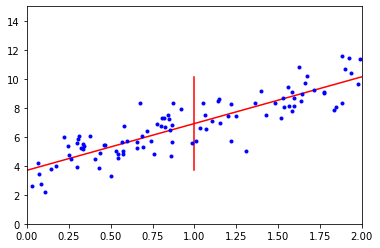

In [10]:
# plot the prediction
plt.plot(X_new_b, y_predict, "r-")
plt.plot(X, Y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

### Using Stochastic Gradient Descent

#### a. using simple learning schedule

In [11]:
theta_path_sgd = []
epochs = 50  # Number of iterations
t0, t1 = 5, 50  # Learning Schedule Hyper-parameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)

for epoch in range(epochs):    # epochs = 50
    for i in range(m):         # m = 100
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = Y[random_index : random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)   # Calculating Gradient     
        eta = learning_schedule(epoch * m * i)        # learning Rate
        theta = theta - eta * gradients
print(theta)

[[3.92058321]
 [3.41226655]]


In [12]:
# Making Predictions using minimum values of theta
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # Adding bias term using concatenation(np.c_)

y_predict = X_new_b . dot(theta)
y_predict

array([[ 3.92058321],
       [10.74511632]])

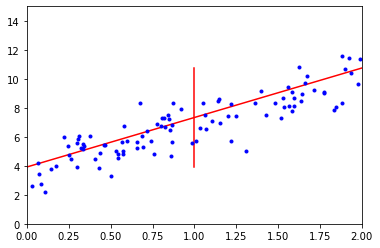

In [13]:
# plot the prediction
plt.plot(X_new_b, y_predict, "r-")
plt.plot(X, Y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

#### b. Using Sklearn

The fol‐lowing code runs for maximum 1000 epochs (max_iter=1000) or until the loss dropsby  less  than  1e^-3  during  one  epoch  (tolerance=1e-3),  starting  with  a  learning  rate  of  0.1(eta0=0.1),  using  the  default  learning  schedule  (different  from  the  preceding  one),and it does not use any regularization (penalty=None;)

In [14]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None, eta0 = 0.1)
sgd_reg.fit(X, Y.ravel())

print(sgd_reg.intercept_, sgd_reg.coef_)

[3.6689819] [3.20817203]


### Using Mini-Batch Gradient Descent

In [15]:
epochs = 50
minibatch_size = 20

np.random.seed(4)
theta = np.random.randn(2, 1)
t0, t1 = 200, 1000

def learning_schedule(t):
    return t0 / (t + t1)
t = 0

for epoch in range(epochs):
    shuffeled_indices = np.random.permutation(m)  # shuffel indices of dataset
    X_b_shuffeled = X_b[shuffeled_indices]
    y_shuffeled = Y[shuffeled_indices]
    
    for i in range(0, m, minibatch_size):
        t += 1
        Xi = X_b[t : t + minibatch_size]
        yi = Y[t : t + minibatch_size]
        gradients = 2/minibatch_size * Xi.T.dot(Xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        
print(theta)

[[3.49194695]
 [2.9504271 ]]


In [16]:
# Making Predictions using minimum values of theta
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # Adding bias term using concatenation(np.c_)

y_predict = X_new_b . dot(theta)
y_predict

array([[3.49194695],
       [9.39280115]])

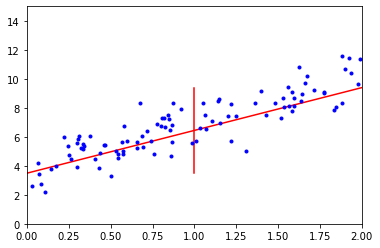

In [17]:
# plot the prediction
plt.plot(X_new_b, y_predict, "r-")
plt.plot(X, Y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()